In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline
import scipy.stats as stats
import math


UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
wholesale = pd.read_csv('Wholesale Customer.csv')
wholesale.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
wholesale['Region'].unique()

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [5]:
wholesale['Channel'].unique()

array(['Retail', 'Hotel'], dtype=object)

## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [6]:
data = wholesale.copy()

In [7]:
data['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [8]:
data['Channel'].value_counts()/data['Channel'].size*100

Hotel     67.727273
Retail    32.272727
Name: Channel, dtype: float64

In [9]:
data['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [10]:
region_wise_contri =data['Region'].value_counts()/data['Region'].size*100
region_wise_contri

Other     71.818182
Lisbon    17.500000
Oporto    10.681818
Name: Region, dtype: float64

In [11]:
data.describe().drop('Buyer/Spender',axis=1).T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [12]:
data['Total_Spend'] = data['Fresh']+data['Milk']+data['Grocery']+data['Frozen']+ data['Detergents_Paper']+data['Delicatessen']
                                                                                               

In [13]:
data

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [14]:
data_3 = data.groupby(data['Channel']=='Retail')['Milk','Grocery','Detergents_Paper'].sum()
data_3

<ipython-input-14-6123191be715>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_3 = data.groupby(data['Channel']=='Retail')['Milk','Grocery','Detergents_Paper'].sum()


,Milk,Grocery,Detergents_Paper
Channel,,,
False,1028614,1180717,235587
True,1521743,2317845,1032270


In [15]:
x = data.iloc[:, 3:-1].sum(axis = 0)
x

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: int64

In [16]:
data1 = data.groupby('Channel')['Total_Spend'].sum()

data1

Channel
Hotel     7999569
Retail    6619931
Name: Total_Spend, dtype: int64

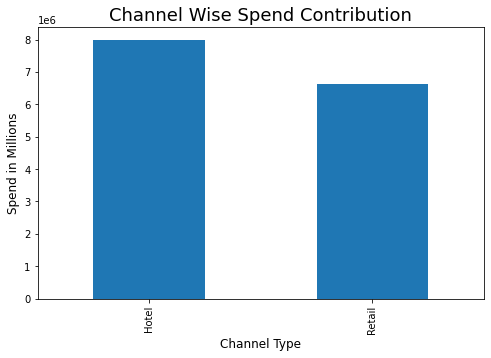

In [17]:
data1.plot(kind= 'bar',figsize=(8,5))
plt.title('Channel Wise Spend Contribution',fontsize=18)
plt.xlabel('Channel Type',fontsize=12)
plt.ylabel('Spend in Millions',fontsize=12)
plt.show()


In [18]:
data2 = data.groupby('Region')['Total_Spend'].sum()

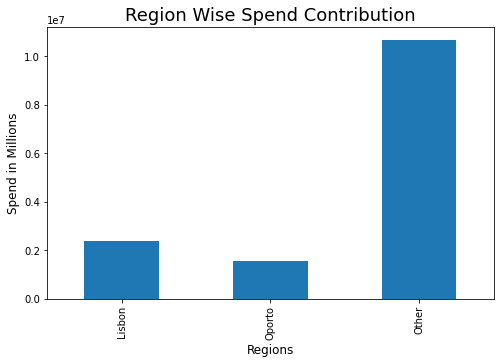

In [19]:
data2.plot(kind= 'bar',figsize=(8,5))
plt.title('Region Wise Spend Contribution',fontsize=18)
plt.xlabel('Regions',fontsize=12)
plt.ylabel('Spend in Millions',fontsize=12)
plt.show()



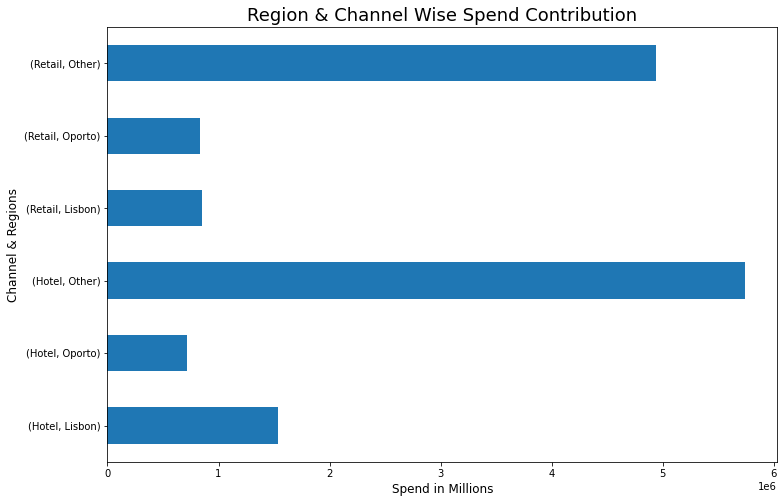

In [20]:
combined_data = data.groupby(['Channel','Region'])['Total_Spend'].sum()

plt.figure(figsize=(12,8))
combined_data.plot(kind='barh')
plt.title('Region & Channel Wise Spend Contribution',fontsize=18)
plt.ylabel('Channel & Regions',fontsize=12)
plt.xlabel('Spend in Millions',fontsize=12)
plt.show()

## 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

In [21]:
data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [22]:
new_data = data.copy() 

In [23]:
new_data.drop('Buyer/Spender', axis = 1,inplace=True)


In [24]:
new_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spend
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [25]:
round(new_data.groupby('Channel').describe().T,2)

Channel                     Hotel     Retail
Fresh            count     298.00     142.00
                 mean    13475.56    8904.32
                 std     13831.69    8987.71
                 min         3.00      18.00
                 25%      4070.25    2347.75
                 50%      9581.50    5993.50
                 75%     18274.75   12229.75
                 max    112151.00   44466.00
Milk             count     298.00     142.00
                 mean     3451.72   10716.50
                 std      4352.17    9679.63
                 min        55.00     928.00
                 25%      1164.50    5938.00
                 50%      2157.00    7812.00
                 75%      4029.50   12162.75
                 max     43950.00   73498.00
Grocery          count     298.00     142.00
                 mean     3962.14   16322.85
                 std      3545.51   12267.32
                 min         3.00    2743.00
                 25%      1703.75    9245.25
                 50%      2684.00   12390.00
                 75%      5076.75   20183.50
                 max     21042.00   92780.00
Frozen           count     298.00     142.00
                 mean     3748.25    1652.61
                 std      5643.91    1812.80
                 min        25.00      33.00
                 25%       830.00     534.25
                 50%      2057.50    1081.00
                 75%      4558.75    2146.75
                 max     60869.00   11559.00
Detergents_Paper count     298.00     142.00
                 mean      790.56    7269.51
                 std      1104.09    6291.09
                 min         3.00     332.00
                 25%       183.25    3683.50
                 50%       385.50    5614.50
                 75%       899.50    8662.50
                 max      6907.00   40827.00
Delicatessen     count     298.00     142.00
                 mean     1415.96    1753.44
                 std      3147.43    1953.80
                 min         3.00       3.00
                 25%       379.00     566.75
                 50%       821.00    1350.00
                 75%      1548.00    2156.00
                 max     47943.00   16523.00
Total_Spend      count     298.00     142.00
                 mean    26844.19   46619.23
                 std     22164.84   29346.87
                 min       904.00   14993.00
                 25%     13859.25   30147.25
                 50%     21254.50   37139.00
                 75%     32113.75   51650.50
                 max    190169.00  199891.00

In [26]:
round(new_data.groupby('Region').describe().T,2)

Region                     Lisbon     Oporto      Other
Fresh            count      77.00      47.00     316.00
                 mean    11101.73    9887.68   12533.47
                 std     11557.44    8387.90   13389.21
                 min        18.00       3.00       3.00
                 25%      2806.00    2751.50    3350.75
                 50%      7363.00    8090.00    8752.50
                 75%     15218.00   14925.50   17406.50
                 max     56083.00   32717.00  112151.00
Milk             count      77.00      47.00     316.00
                 mean     5486.42    5088.17    5977.09
                 std      5704.86    5826.34    7935.46
                 min       258.00     333.00      55.00
                 25%      1372.00    1430.50    1634.00
                 50%      3748.00    2374.00    3684.50
                 75%      7503.00    5772.50    7198.75
                 max     28326.00   25071.00   73498.00
Grocery          count      77.00      47.00     316.00
                 mean     7403.08    9218.60    7896.36
                 std      8496.29   10842.75    9537.29
                 min       489.00    1330.00       3.00
                 25%      2046.00    2792.50    2141.50
                 50%      3838.00    6114.00    4732.00
                 75%      9490.00   11758.50   10559.75
                 max     39694.00   67298.00   92780.00
Frozen           count      77.00      47.00     316.00
                 mean     3000.34    4045.36    2944.59
                 std      3092.14    9151.78    4260.13
                 min        61.00     131.00      25.00
                 25%       950.00     811.50     664.75
                 50%      1801.00    1455.00    1498.00
                 75%      4324.00    3272.00    3354.75
                 max     18711.00   60869.00   36534.00
Detergents_Paper count      77.00      47.00     316.00
                 mean     2651.12    3687.47    2817.75
                 std      4208.46    6514.72    4593.05
                 min         5.00      15.00       3.00
                 25%       284.00     282.50     251.25
                 50%       737.00     811.00     856.00
                 75%      3593.00    4324.50    3875.75
                 max     19410.00   38102.00   40827.00
Delicatessen     count      77.00      47.00     316.00
                 mean     1354.90    1159.70    1620.60
                 std      1345.42    1050.74    3232.58
                 min         7.00      51.00       3.00
                 25%       548.00     540.50     402.00
                 50%       806.00     898.00     994.00
                 75%      1775.00    1538.50    1832.75
                 max      6854.00    5609.00   47943.00
Total_Spend      count      77.00      47.00     316.00
                 mean    30997.57   33086.98   33789.87
                 std     20321.81   24234.51   27949.34
                 min      4925.00    4129.00     904.00
                 25%     17184.00   20611.50   17209.25
                 50%     25385.00   26953.00   28029.00
                 75%     38699.00   36158.50   42492.25
                 max    107155.00  130877.00  199891.00

In [27]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Buyer/Spender         219.50
Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicatessen         1412.00
Total_Spend         23858.75
dtype: float64


In [28]:
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

In [29]:
lower_bound.drop('Buyer/Spender')

Fresh              -17581.250
Milk                -6952.875
Grocery            -10601.125
Frozen              -3475.750
Detergents_Paper    -5241.125
Delicatessen        -1709.750
Total_Spend        -18339.375
dtype: float64

In [30]:
upper_bound.drop('Buyer/Spender')

Fresh               37642.750
Milk                15676.125
Grocery             23409.875
Frozen               7772.250
Detergents_Paper     9419.875
Delicatessen         3938.250
Total_Spend         77095.625
dtype: float64

In [31]:
data[data.Fresh>37642.750].shape # Total number of outliers in Fresh

(20, 10)

In [32]:
data[data.Milk>15676.125].shape# Total number of outliers in Milk

(28, 10)

In [33]:
data[data.Grocery>23409.875].shape # Total number of outliers in Grocery

(24, 10)

In [34]:
data[data.Frozen> 7772.250].shape # Total number of outliers in Frozen

(43, 10)

In [35]:
data[data.Detergents_Paper>9419.875].shape # Total number of outliers in Detergents_Paper

(30, 10)

In [36]:
data[data.Delicatessen>3938.250].shape # Total number of outliers in Delicatessen

(27, 10)

In [37]:
def cv_product(sd,avg):
    cv = round(sd/avg,2)
    return cv

In [38]:
new_data.describe().drop('Total_Spend',axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [39]:
cv_fresh = cv_product(12647.328865,12000.297727) #Coefficirnt of Variation of Fresh items
cv_fresh

1.05

In [40]:
cv_milk = cv_product(7380.37,5796.26) #Coefficirnt of Variation of Milk items
cv_milk

1.27

In [41]:
cv_grocery= cv_product(9503.162829,7951.277273) #Coefficirnt of Variation of Grocery items
cv_grocery

1.2

In [42]:
cv_frozen= cv_product(4854.673333,3071.931818) #Coefficirnt of Variation of Frozen items
cv_frozen

1.58

In [43]:
cv_dtgnt = cv_product(4767.854448,4767.854448) #Coefficirnt of Variation of Detergent items
cv_dtgnt

1.0

In [44]:
cv_delct = cv_product(2820.105937,1524.870455) #Coefficirnt of Variation of Delicatessen items
cv_delct

1.85

### Plotting Fresh products against Channel and Region

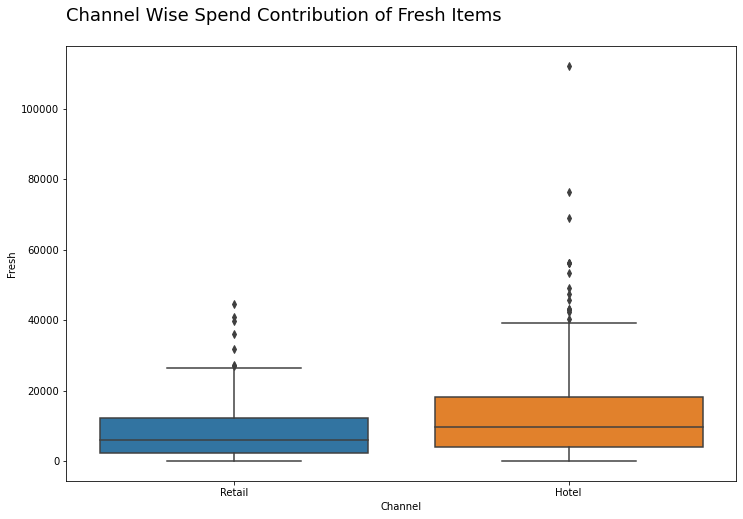

In [45]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Channel', y = 'Fresh',data=new_data)
plt.title('Channel Wise Spend Contribution of Fresh Items',loc='left',pad= 25,fontsize=18)
plt.show()

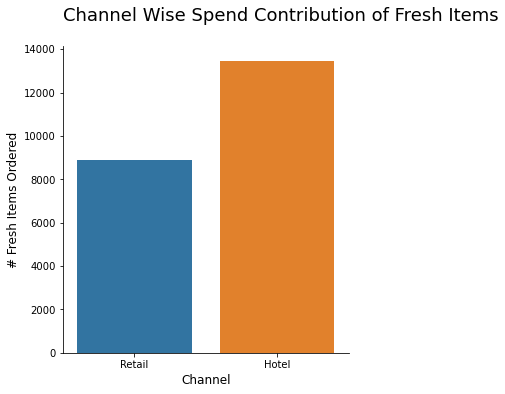

In [46]:
sns.catplot(x= 'Channel', y = 'Fresh',kind = 'bar', data = new_data, ci = None)
plt.title('Channel Wise Spend Contribution of Fresh Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('# Fresh Items Ordered',fontsize=12)
plt.show()

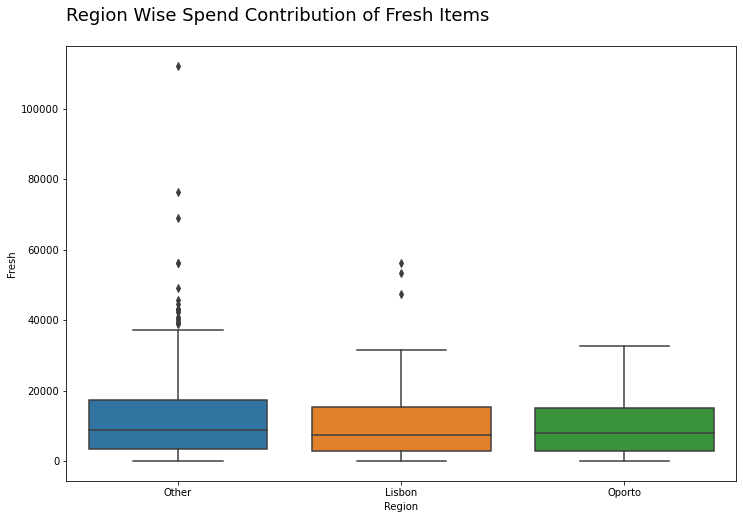

In [47]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Region', y = 'Fresh',data=new_data)
plt.title('Region Wise Spend Contribution of Fresh Items',loc='left',pad= 25,fontsize=18)
plt.show()

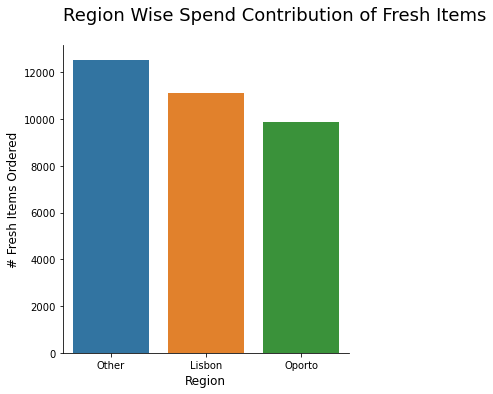

In [48]:
sns.catplot(x= 'Region', y = 'Fresh',kind = 'bar', data = new_data, ci = None)
plt.title('Region Wise Spend Contribution of Fresh Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Region',fontsize=12)
plt.ylabel('# Fresh Items Ordered',fontsize=12)
plt.show()


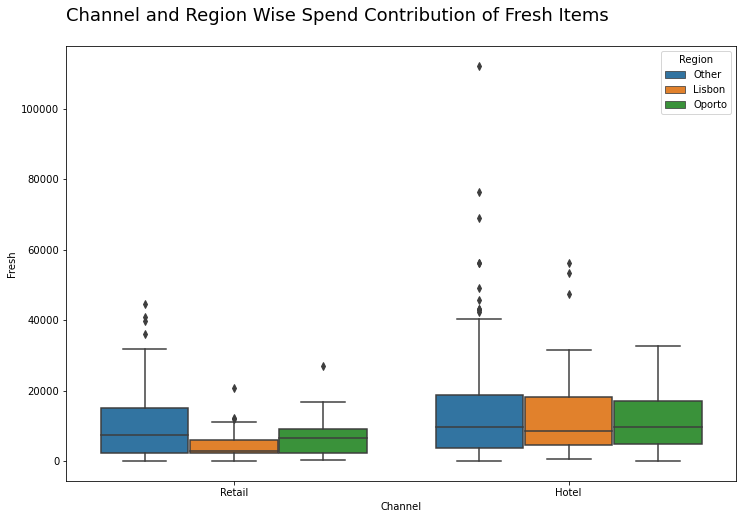

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Channel', y = 'Fresh',hue='Region',data=new_data)
plt.title('Channel and Region Wise Spend Contribution of Fresh Items',loc='left',pad= 25,fontsize=18)
plt.show()

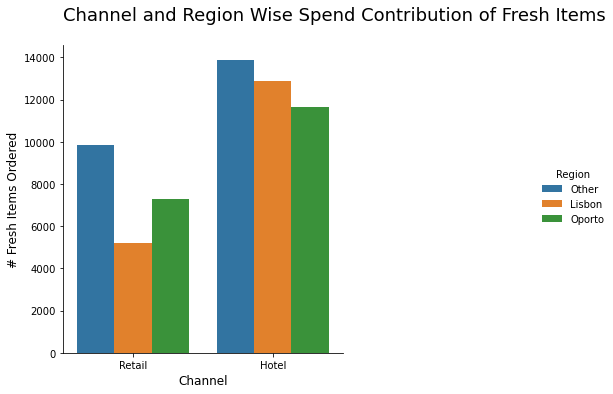

In [50]:
sns.catplot(x= 'Channel', y = 'Fresh',kind = 'bar',hue= 'Region', data = new_data, ci = None)
plt.title('Channel and Region Wise Spend Contribution of Fresh Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('# Fresh Items Ordered',fontsize=12)
plt.show()


### Plotting Milk products against Channel and Region

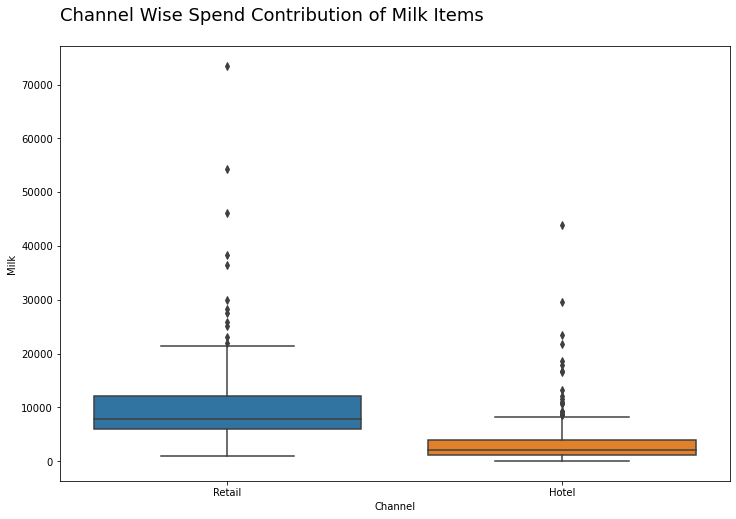

In [51]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Channel', y = 'Milk',data=new_data)
plt.title('Channel Wise Spend Contribution of Milk Items',loc='left',pad= 25,fontsize=18)
plt.show()

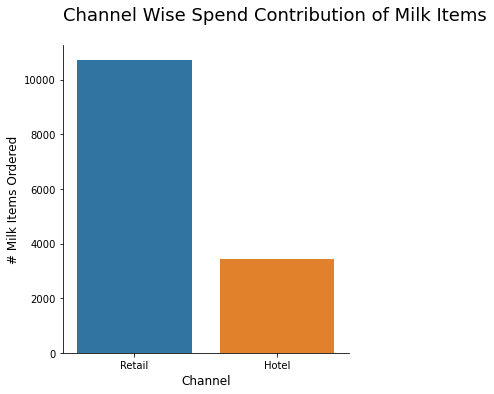

In [52]:
sns.catplot(x= 'Channel', y = 'Milk',kind = 'bar', data = new_data, ci = None)
plt.title('Channel Wise Spend Contribution of Milk Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('# Milk Items Ordered',fontsize=12)
plt.show()

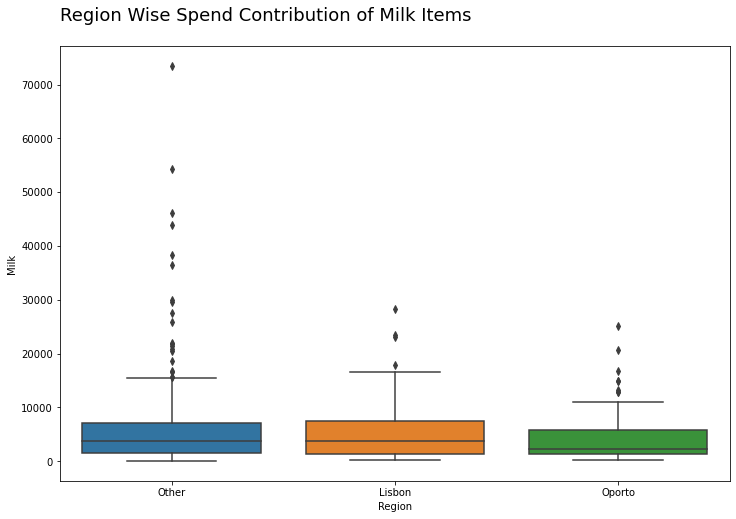

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Region', y = 'Milk',data=new_data)
plt.title('Region Wise Spend Contribution of Milk Items',loc='left',pad= 25,fontsize=18)
plt.show()

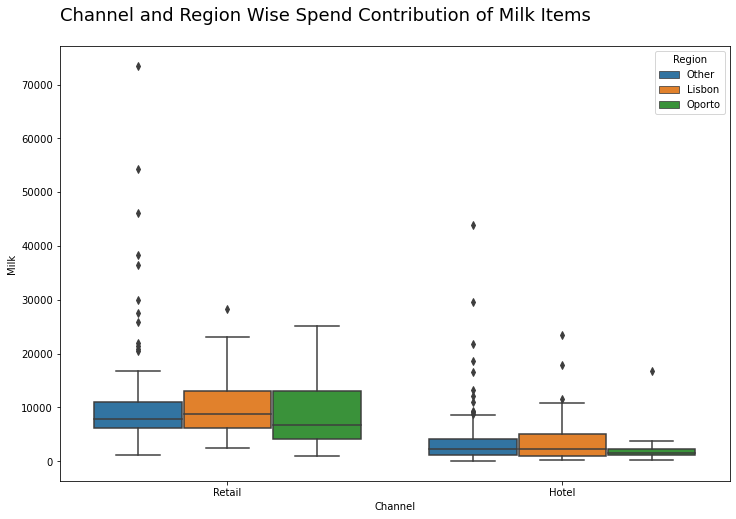

In [54]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Channel', y = 'Milk',hue='Region',data=new_data)
plt.title('Channel and Region Wise Spend Contribution of Milk Items',loc='left',pad= 25,fontsize=18)
plt.show()

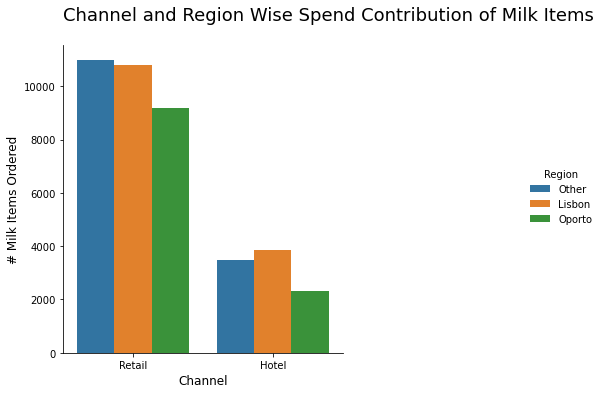

In [55]:
sns.catplot(x= 'Channel', y = 'Milk',kind = 'bar',hue= 'Region', data = new_data, ci = None)
plt.title('Channel and Region Wise Spend Contribution of Milk Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('# Milk Items Ordered',fontsize=12)
plt.show()

### Plotting Grocery products against Channel and Region

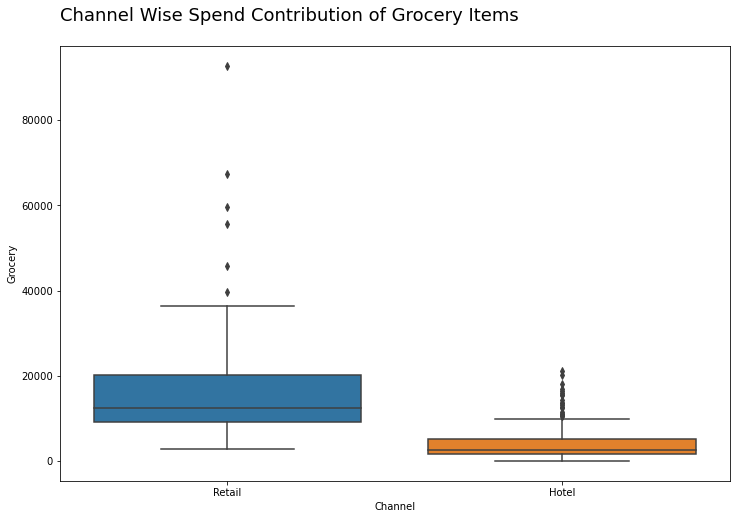

In [56]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Channel', y = 'Grocery',data=new_data)
plt.title('Channel Wise Spend Contribution of Grocery Items',loc='left',pad= 25,fontsize=18)
plt.show()

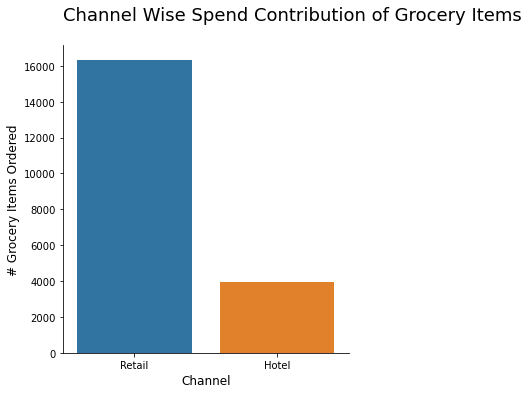

In [57]:
sns.catplot(x= 'Channel', y = 'Grocery',kind = 'bar', data = new_data, ci = None)
plt.title('Channel Wise Spend Contribution of Grocery Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('# Grocery Items Ordered',fontsize=12)
plt.show()

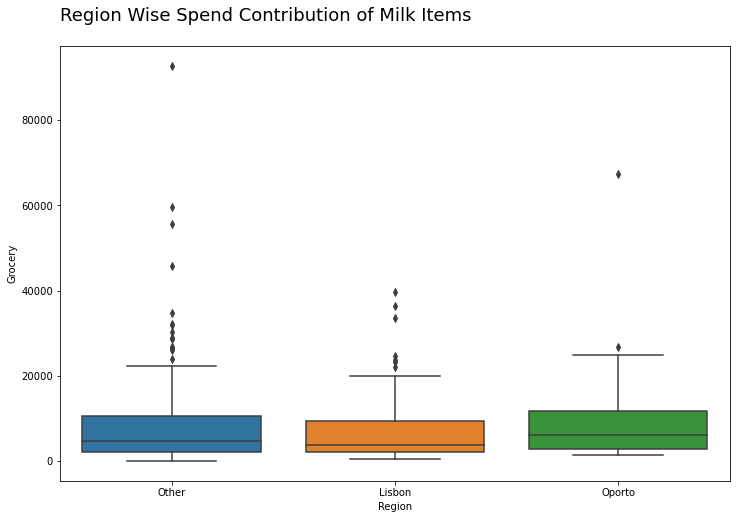

In [58]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Region', y = 'Grocery',data=new_data)
plt.title('Region Wise Spend Contribution of Milk Items',loc='left',pad= 25,fontsize=18)
plt.show()

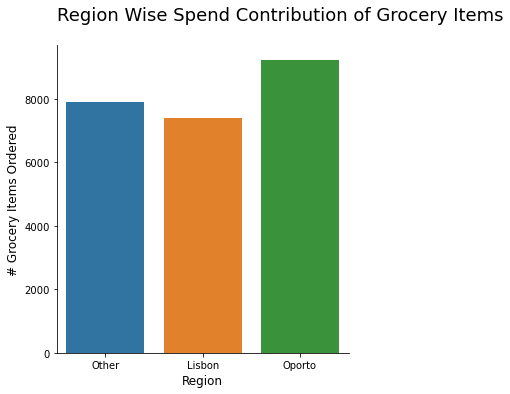

In [59]:
sns.catplot(x= 'Region', y = 'Grocery',kind = 'bar', data = new_data, ci = None)
plt.title('Region Wise Spend Contribution of Grocery Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Region',fontsize=12)
plt.ylabel('# Grocery Items Ordered',fontsize=12)
plt.show()

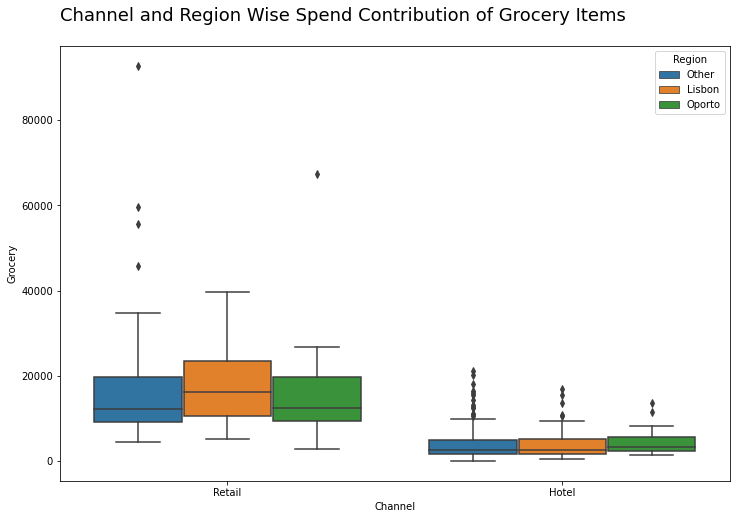

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Channel', y = 'Grocery',hue='Region',data=new_data)
plt.title('Channel and Region Wise Spend Contribution of Grocery Items',loc='left',pad= 25,fontsize=18)
plt.show()

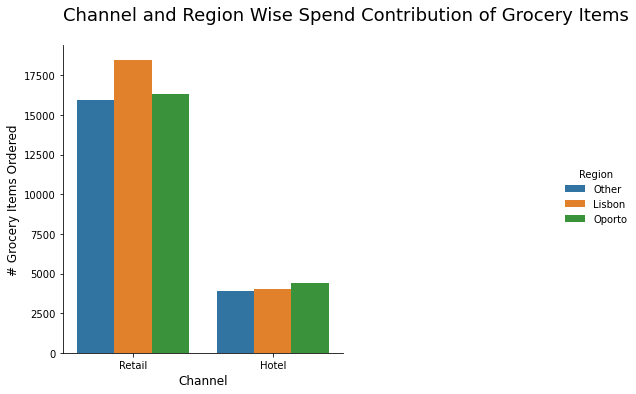

In [61]:
sns.catplot(x= 'Channel', y = 'Grocery',kind = 'bar',hue= 'Region', data = new_data, ci = None)
plt.title('Channel and Region Wise Spend Contribution of Grocery Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('# Grocery Items Ordered',fontsize=12)
plt.show()

### Plotting Frozen products against Channel and Region

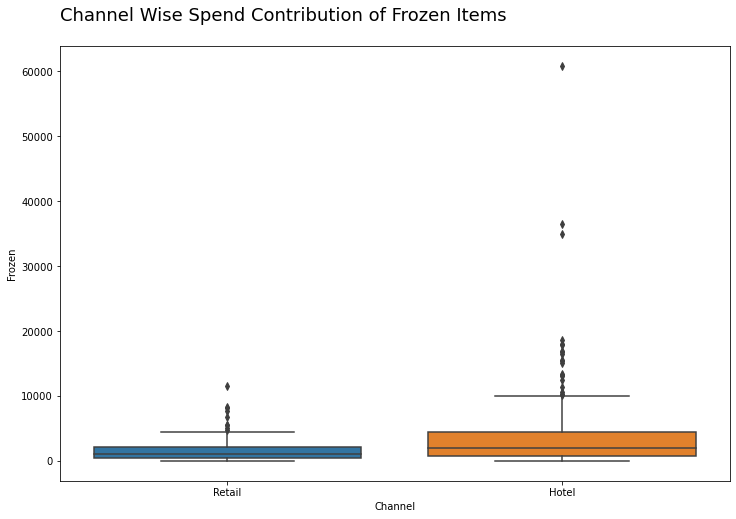

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Channel', y = 'Frozen',data=new_data)
plt.title('Channel Wise Spend Contribution of Frozen Items',loc='left',pad= 25,fontsize=18)
plt.show()

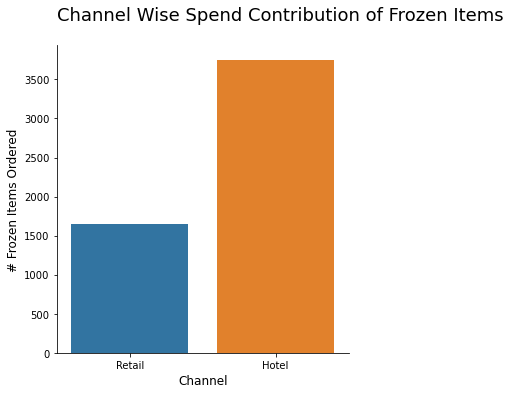

In [63]:
sns.catplot(x= 'Channel', y = 'Frozen',kind = 'bar', data = new_data, ci = None)
plt.title('Channel Wise Spend Contribution of Frozen Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('# Frozen Items Ordered',fontsize=12)
plt.show()

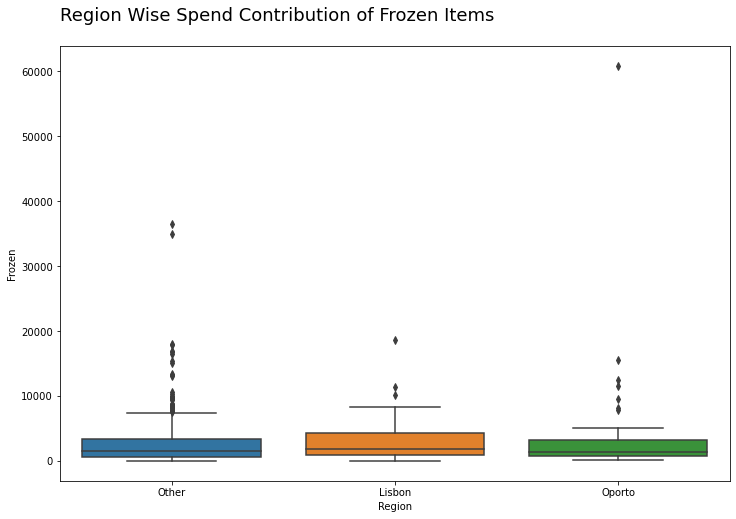

In [64]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Region', y = 'Frozen',data=new_data)
plt.title('Region Wise Spend Contribution of Frozen Items',loc='left',pad= 25,fontsize=18)
plt.show()

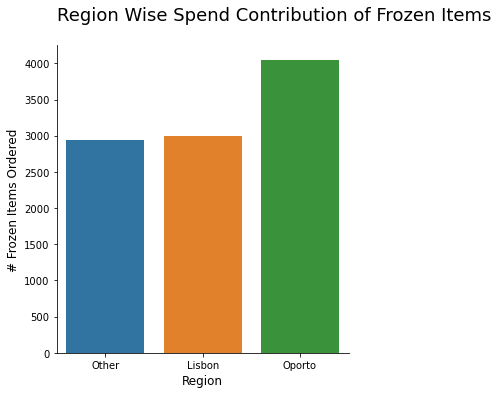

In [65]:
sns.catplot(x= 'Region', y = 'Frozen',kind = 'bar', data = new_data, ci = None)
plt.title('Region Wise Spend Contribution of Frozen Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Region',fontsize=12)
plt.ylabel('# Frozen Items Ordered',fontsize=12)
plt.show()

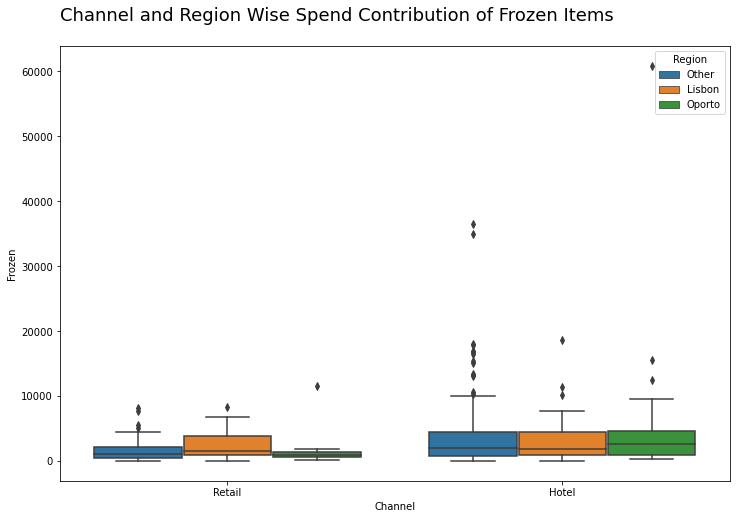

In [66]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Channel', y = 'Frozen',hue='Region',data=new_data)
plt.title('Channel and Region Wise Spend Contribution of Frozen Items',loc='left',pad= 25,fontsize=18)
plt.show()

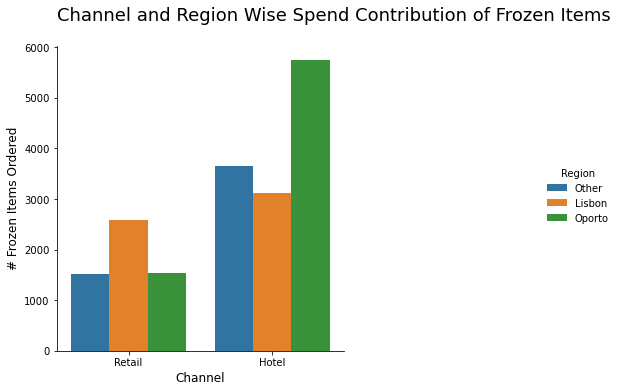

In [67]:
sns.catplot(x= 'Channel', y = 'Frozen',kind = 'bar',hue= 'Region', data = new_data, ci = None)
plt.title('Channel and Region Wise Spend Contribution of Frozen Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('# Frozen Items Ordered',fontsize=12)
plt.show()

### Plotting Detergents_Paper products against Channel and Region

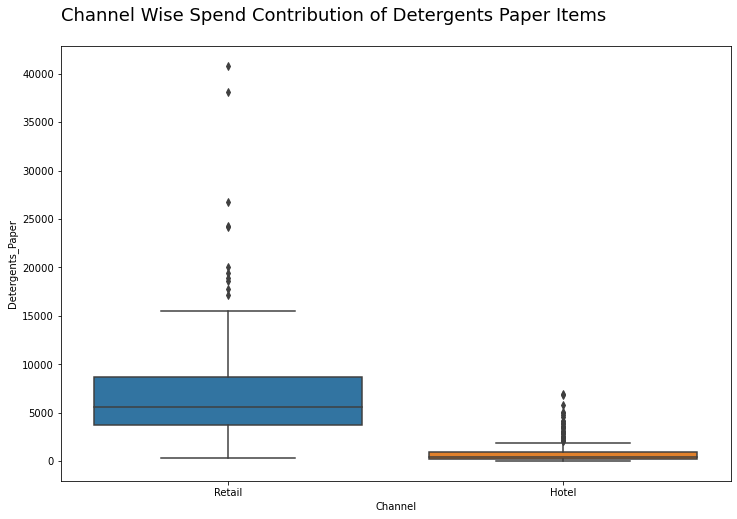

In [68]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Channel', y = 'Detergents_Paper',data=new_data)
plt.title('Channel Wise Spend Contribution of Detergents Paper Items',loc='left',pad= 25,fontsize=18)
plt.show()

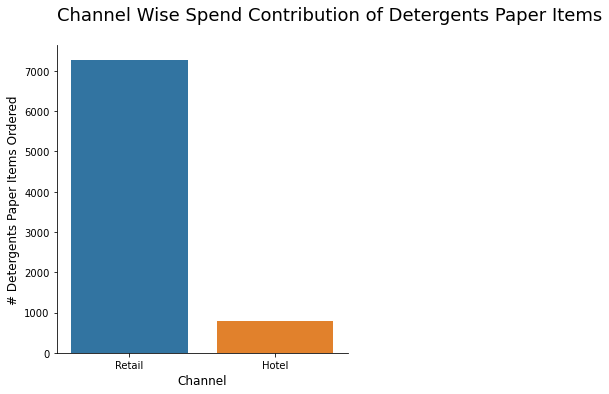

In [69]:
sns.catplot(x= 'Channel', y = 'Detergents_Paper',kind = 'bar', data = new_data, ci = None)
plt.title('Channel Wise Spend Contribution of Detergents Paper Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('# Detergents Paper Items Ordered',fontsize=12)
plt.show()

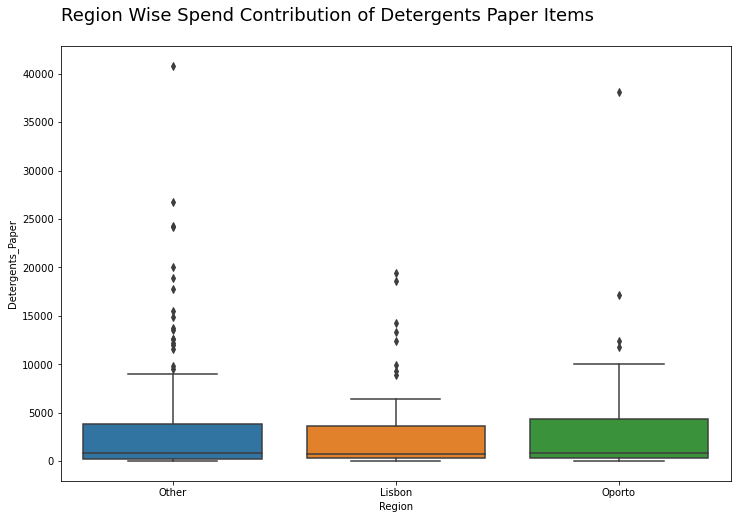

In [70]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Region', y = 'Detergents_Paper',data=new_data)
plt.title('Region Wise Spend Contribution of Detergents Paper Items',loc='left',pad= 25,fontsize=18)
plt.show()

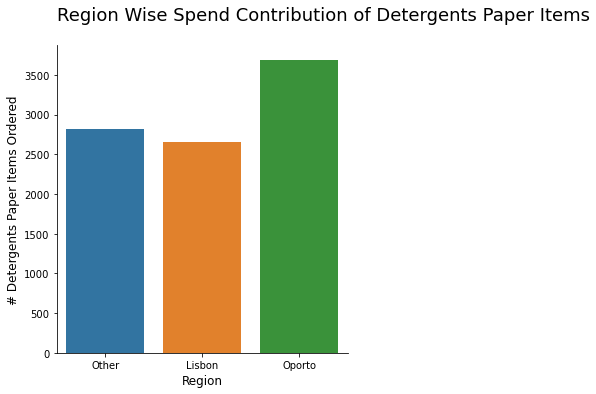

In [71]:
sns.catplot(x= 'Region', y = 'Detergents_Paper',kind = 'bar', data = new_data, ci = None)
plt.title('Region Wise Spend Contribution of Detergents Paper Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Region',fontsize=12)
plt.ylabel('# Detergents Paper Items Ordered',fontsize=12)
plt.show()

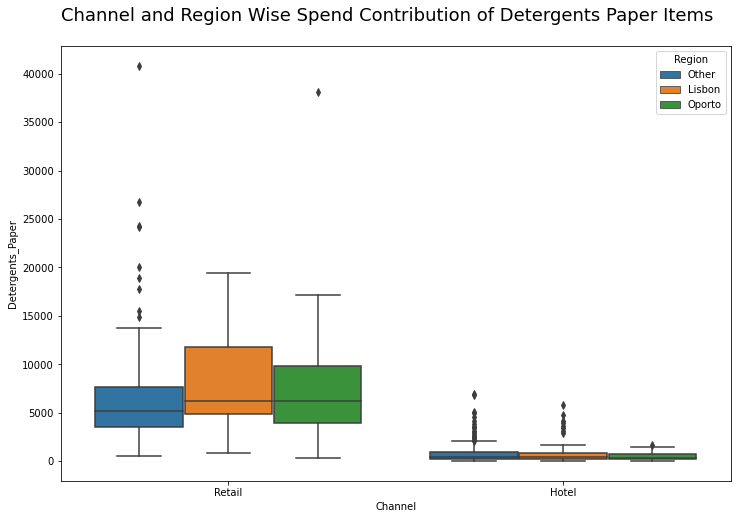

In [72]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Channel', y = 'Detergents_Paper',hue='Region',data=new_data)
plt.title('Channel and Region Wise Spend Contribution of Detergents Paper Items',loc='left',pad= 25,fontsize=18)
plt.show()

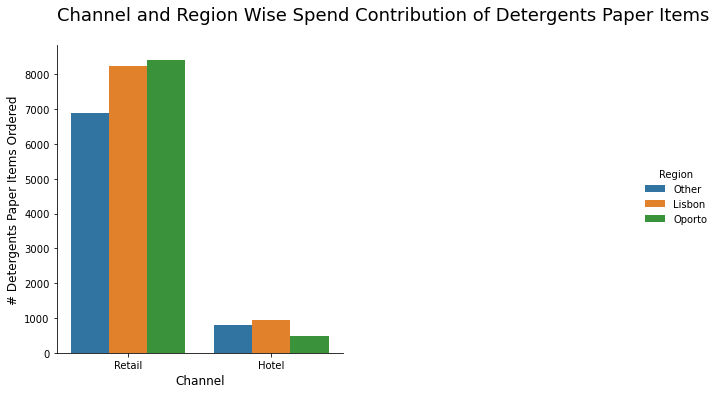

In [73]:
sns.catplot(x= 'Channel', y = 'Detergents_Paper',kind = 'bar',hue= 'Region', data = new_data, ci = None)
plt.title('Channel and Region Wise Spend Contribution of Detergents Paper Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('# Detergents Paper Items Ordered',fontsize=12)
plt.show()

### Plotting Delicatessen products against Channel and Region

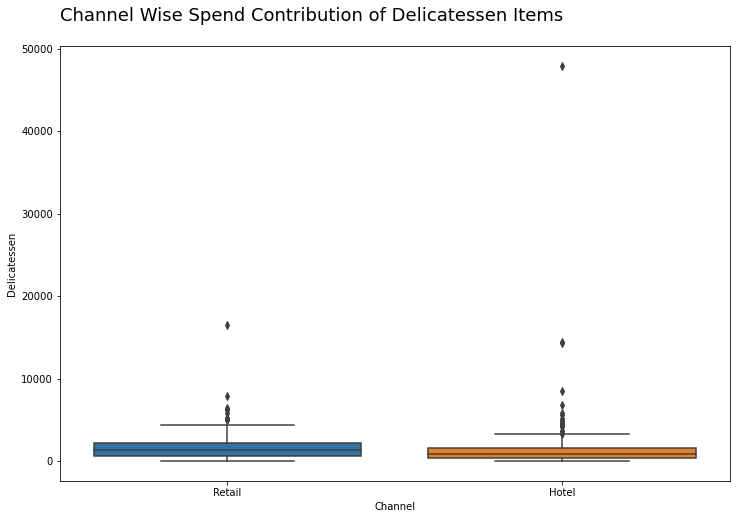

In [74]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Channel', y = 'Delicatessen',data=new_data)
plt.title('Channel Wise Spend Contribution of Delicatessen Items',loc='left',pad= 25,fontsize=18)
plt.show()

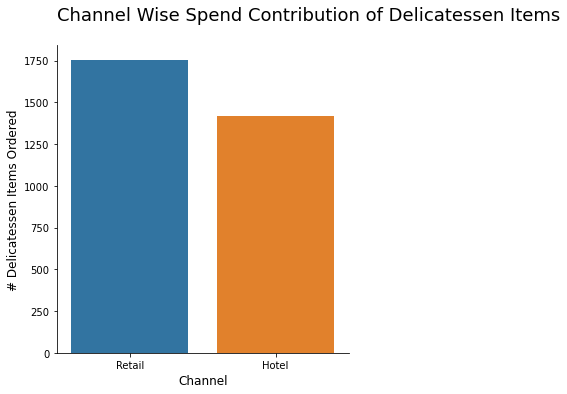

In [75]:
sns.catplot(x= 'Channel', y = 'Delicatessen',kind = 'bar', data = new_data, ci = None)
plt.title('Channel Wise Spend Contribution of Delicatessen Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('# Delicatessen Items Ordered',fontsize=12)
plt.show()

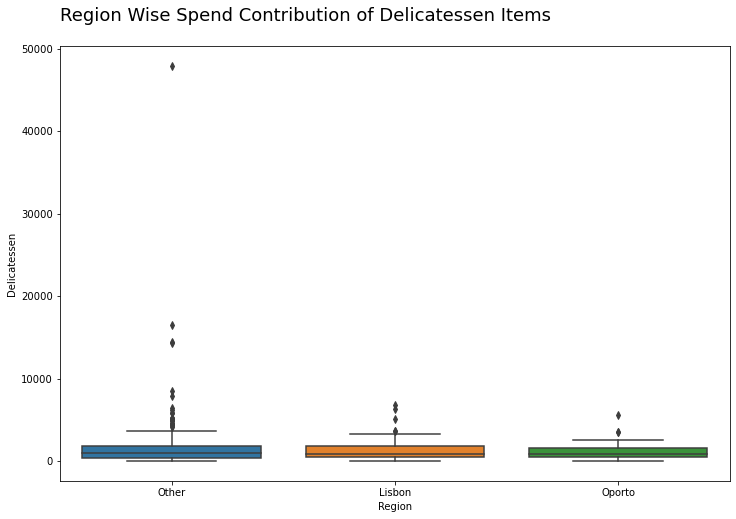

In [76]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Region', y = 'Delicatessen',data=new_data)
plt.title('Region Wise Spend Contribution of Delicatessen Items',loc='left',pad= 25,fontsize=18)
plt.show()

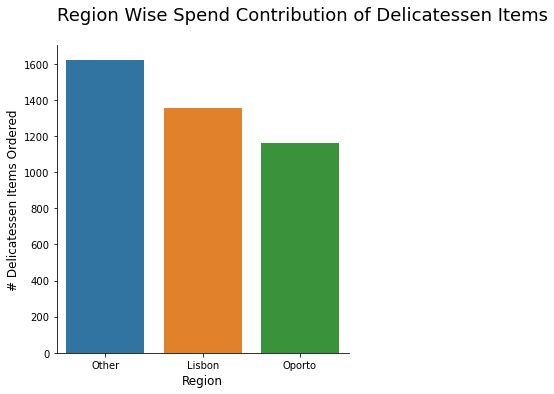

In [77]:
sns.catplot(x= 'Region', y = 'Delicatessen',kind = 'bar', data = new_data, ci = None)
plt.title('Region Wise Spend Contribution of Delicatessen Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Region',fontsize=12)
plt.ylabel('# Delicatessen Items Ordered',fontsize=12)
plt.show()

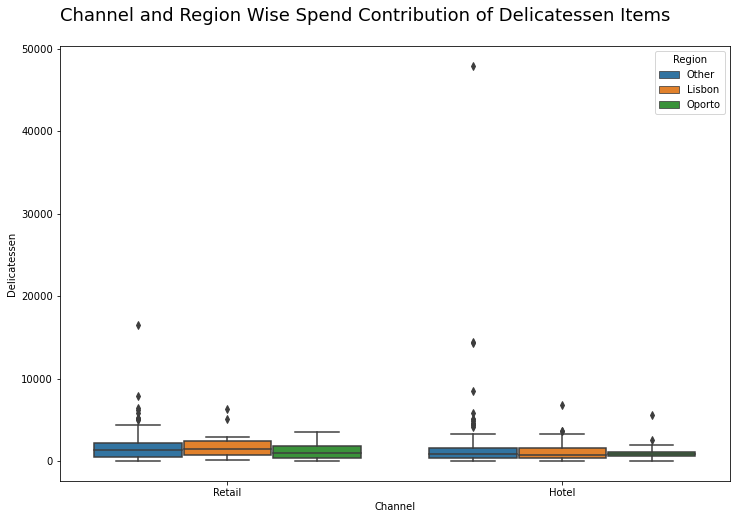

In [78]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Channel', y = 'Delicatessen',hue='Region',data=new_data)
plt.title('Channel and Region Wise Spend Contribution of Delicatessen Items',loc='left',pad= 25,fontsize=18)
plt.show()

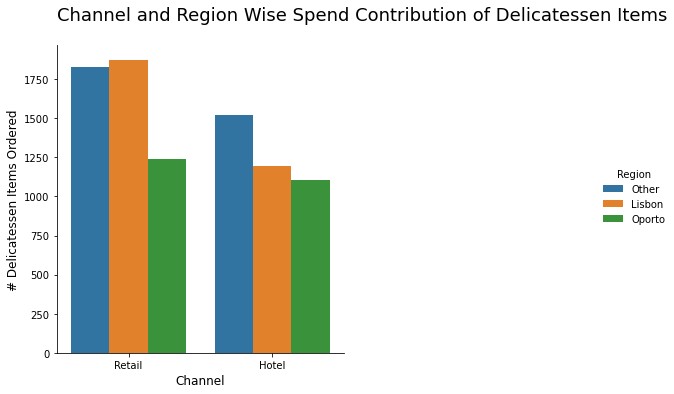

In [79]:
sns.catplot(x= 'Channel', y = 'Delicatessen',kind = 'bar',hue= 'Region', data = new_data, ci = None)
plt.title('Channel and Region Wise Spend Contribution of Delicatessen Items',loc='left',pad= 25,fontsize=18)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('# Delicatessen Items Ordered',fontsize=12)
plt.show()

## 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [80]:
data.describe().drop('Buyer/Spender',axis=1).T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total_Spend,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0


In [81]:
def cv_product(sd,avg): #(sd= standard deviation, avg= mean)
    cv = round(sd/avg,2)
    return cv

In [82]:
cv_fresh

1.05

In [83]:
cv_frozen

1.58

In [84]:
cv_grocery

1.2

In [85]:
cv_milk

1.27

In [86]:
cv_delct

1.85

In [87]:
cv_dtgnt

1.0

In [88]:
all_product_cv = new_data.std()/new_data.mean()
all_product_cv.plot

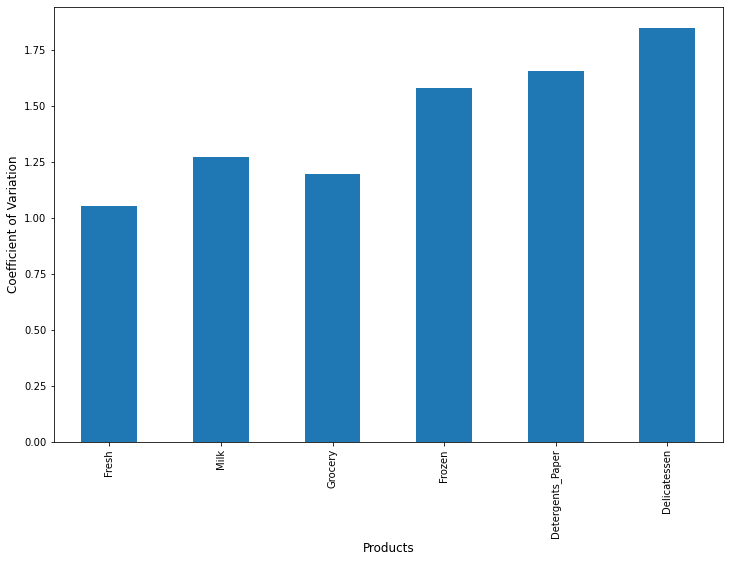

In [89]:
plt.figure(figsize=(12,8))
all_product_cv.drop('Total_Spend').plot(kind='bar')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Coefficient of Variation',fontsize=12)
plt.show()

In [90]:
plt.figure(figsize=(12,8))
all_prod_std.drop('Total_Spend').plot(kind='bar')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Standard Deviation',fontsize=12)
plt.show()

NameError: name 'all_prod_std' is not defined

<Figure size 864x576 with 0 Axes>

## 1.4 Are there any outliers in the data?

In [ ]:
outlier_data = new_data.copy()

In [91]:
outlier_data = new_data.drop('Total_Spend', axis=1)

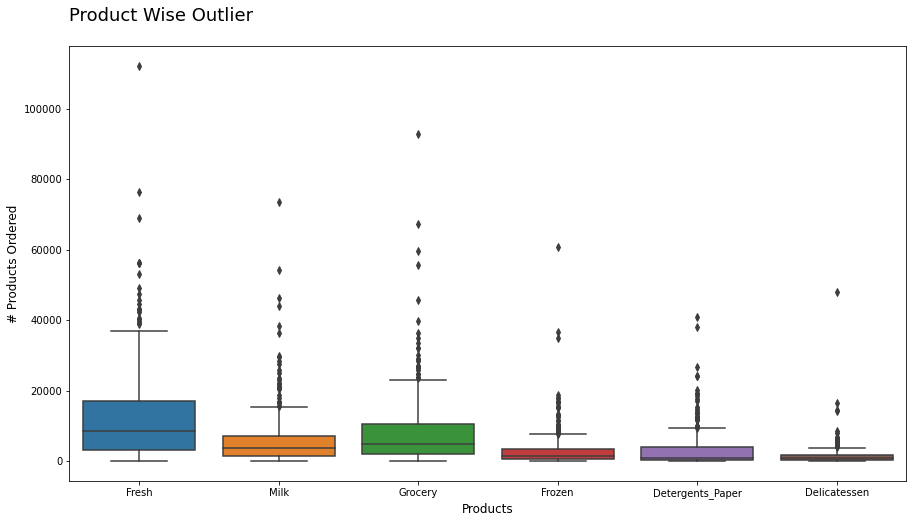

In [92]:
plt.figure(figsize=(15,8))
sns.boxplot(data =outlier_data, orient='v')
plt.title('Product Wise Outlier',loc='left',pad= 25,fontsize=18)
plt.xlabel('Products',fontsize=12)
plt.ylabel('# Products Ordered',fontsize=12)
plt.show()

In [93]:
corr = outlier_data.corr()

In [94]:
corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


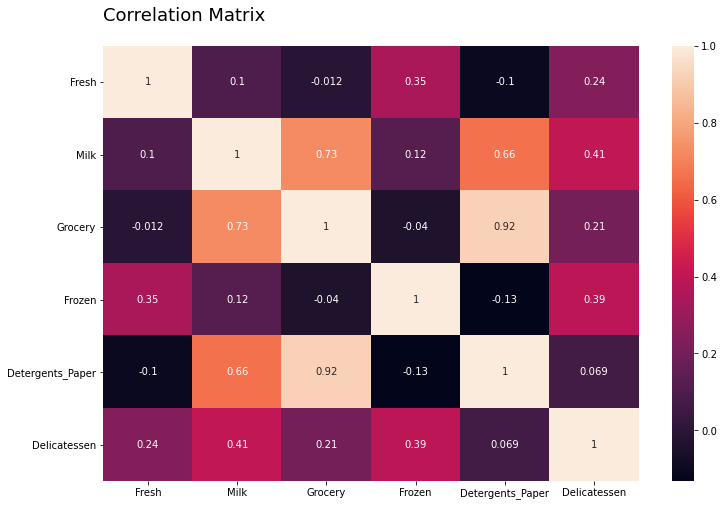

In [95]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix',loc='left',pad= 25,fontsize=18)
plt.show()

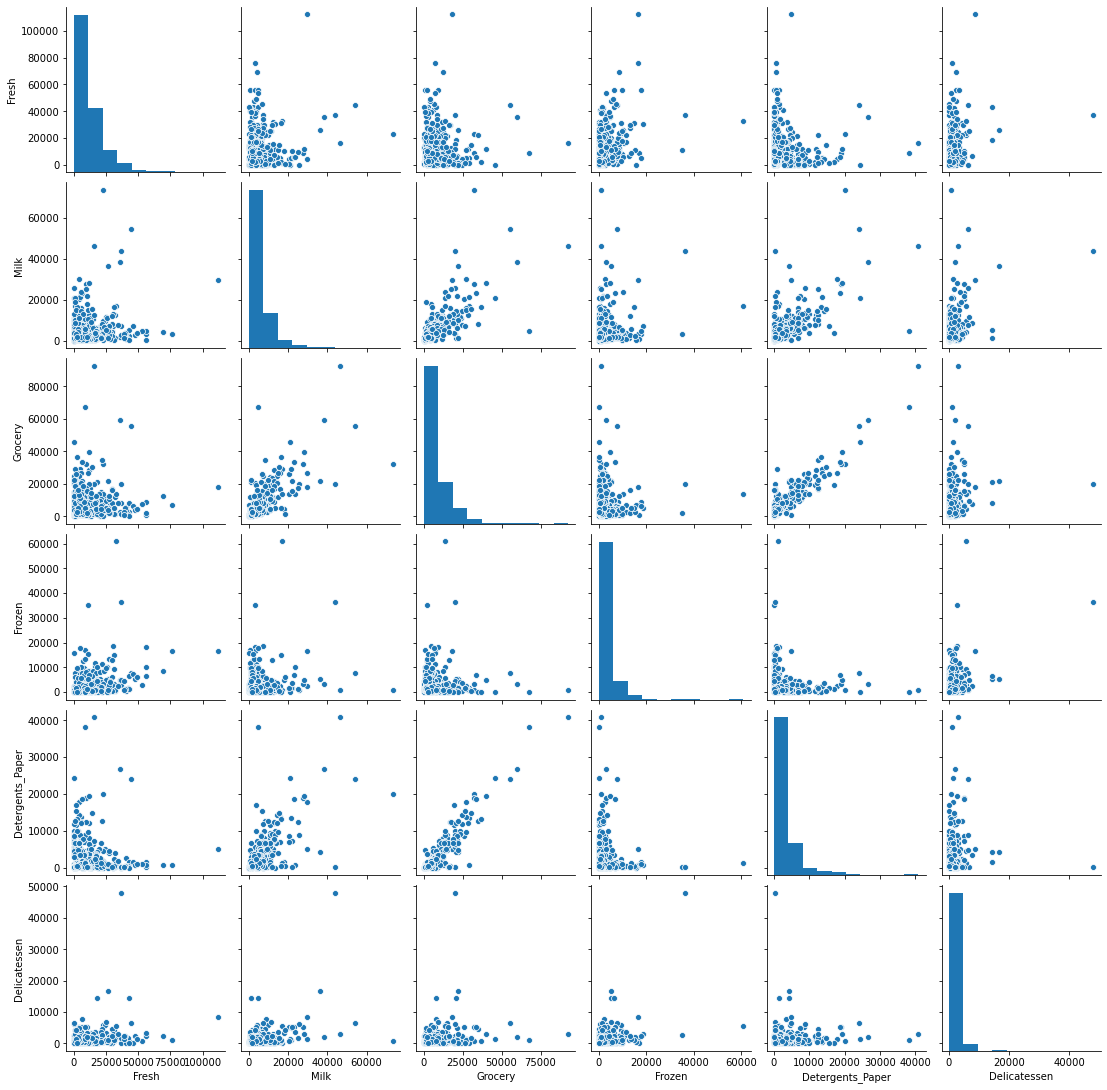

In [96]:
sns.pairplot(outlier_data)

# Student Survey Dataset

In [3]:
survey = pd.read_csv('Survey-1.csv')

In [4]:
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

   ### 2.1.1. Gender and Major 

In [5]:
sub_tab=pd.crosstab(survey.Gender, survey.Major, margins=True,margins_name='Total')
sub_tab

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


### 2.1.2. Gender and Grad Intention

In [6]:
grad = pd.crosstab(survey.Gender, survey['Grad Intention'], margins=True,margins_name='Total')
grad

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


### 2.1.3. Gender and Employment

In [7]:
employment = pd.crosstab(survey.Gender, survey['Employment'], margins=True,margins_name='Total')
employment

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [8]:
full_timers = employment['Full-Time']['Total']
full_timers

10

### 2.1.4. Gender and Computer

In [9]:
pd.crosstab(survey.Gender, survey['Computer'], margins=True,margins_name='Total')

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [11]:
sub_tab

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [12]:
employment

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [13]:
grad

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [14]:
pd.crosstab(survey.Gender, survey['Computer'], margins=True,margins_name='Total')

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [108]:
P_Male = 29/62
P_Male

print('The probability that a randomly selected CMSU student will be male is ', round(P_Male,2))

The probability that a randomly selected CMSU student will be male is  0.47


### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [110]:
P_Female = 33/62
P_Female

print('The probability that a randomly selected CMSU student will be Female is ', round(P_Female,2))

The probability that a randomly selected CMSU student will be Female is  0.53


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [190]:
sub_tab

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [111]:
def cond_prob (x,y): #x is the subject specific gender count, y is the total gender count (M or F)
    value = x/y
    return value

In [112]:
# Probability of Account given male

cond_prob(4,29)

0.13793103448275862

In [113]:
#Probability of Male given CIS

cond_prob(1,29)

0.034482758620689655

In [114]:
#Probability of Male given Economics/Finance

cond_prob(4,29)

0.13793103448275862

In [115]:
#Probability of Male given Intl Business

cond_prob(2,29)

0.06896551724137931

In [116]:
#Probability of Male given Management

cond_prob(6,29)

0.20689655172413793

In [117]:
#Probability of Male given Other

cond_prob(4,29)

0.13793103448275862

In [118]:
#Probability of Male given Retailing

cond_prob(5,29)

0.1724137931034483

In [119]:
#Probability of Male who are undecided

cond_prob(3,29)

0.10344827586206896

### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [120]:
#Probability of Female given Accounting

cond_prob(3,33)

0.09090909090909091

In [121]:
#Probability of Female given CIS

cond_prob(3,33)

0.09090909090909091

In [122]:
#Probability of Female given Economics/Finance

cond_prob(7,33)

0.21212121212121213

In [123]:
#Probability of Female given Intl Business

cond_prob(4,33)

0.12121212121212122

In [124]:
#Probability of Female given Management

cond_prob(4,33)

0.12121212121212122

In [125]:
#Probability of Female given Other

cond_prob(3,33)

0.09090909090909091

In [126]:
#Probability of Female given Retailing

cond_prob(9,33)

0.2727272727272727

## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate. 

In [127]:
# Probability of Male  who intends to graduate

cond_prob(17,29)

0.5862068965517241

### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [191]:
pd.crosstab(survey.Gender, survey['Computer'], margins=True,margins_name='Total')

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [129]:
#Probability that a Female does not have a Laptop

cond_prob(4,33) # It is 1 Minus the Females having Laptop

0.12121212121212122

### 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

In [130]:
employment

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [131]:
prob_male = 29/62
prob_ftemploy = 10/62
prob_malenftemploy = 7/62

prob_male_or_ft_employ = prob_male + prob_ftemploy - prob_malenftemploy
prob_male_or_ft_employ

0.5161290322580645

### 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [133]:
sub_table= pd.crosstab(survey.Gender, survey.Major, margins=True,margins_name='Total')
sub_table

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [134]:
# As per the data, students are choosing one course only. Hence a student choosing both IB and Management is 0

Prob_IB_given_Female = 4/33
Prob_Management_given_Female = 4/33

Prob_IB_or_Management_given_Female = Prob_IB_given_Female + Prob_Management_given_Female
round(Prob_IB_or_Management_given_Female,2)

0.24

### 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [137]:
new_survey = survey.copy()

In [138]:
new_survey['Grad Intention'].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

In [139]:
i = new_survey[((new_survey['Grad Intention'] == 'Undecided'))].index
i

Int64Index([ 4,  5,  6,  7,  9, 12, 13, 15, 16, 17, 19, 20, 21, 22, 29, 30, 34,
            42, 45, 47, 49, 52],
           dtype='int64')

In [140]:
new_survey = new_survey.drop(i)
new_survey['Grad Intention'].value_counts()

Yes    28
No     12
Name: Grad Intention, dtype: int64

In [141]:
new_grad = pd.crosstab(new_survey.Gender,new_survey['Grad Intention'],margins=True,margins_name='Total')
new_grad

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20
Total,12,28,40


* Graduate intention and being female are not independent events as P(Female|Grad Intention No) $\neq$ P(Female) and P(Female|Grad Intention Yes) $\neq$ P(Female)

### 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [142]:
pd.crosstab(survey.Gender,survey.GPA,margins=True, margins_name='Total')

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,Total
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
Total,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [143]:
grade_labels = ['Poor', 'Average', 'Good', 'Excellent'] #GPA less than 3 has been put in bin Poor
bins = [0,2.9,3.5,3.6,3.9 ]
survey['GPA_Feedback'] = pd.cut(survey['GPA'], bins=bins, labels=grade_labels)

In [145]:
survey.head(20)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages,GPA_Feedback
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200,Poor
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50,Good
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200,Poor
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250,Poor
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100,Poor
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30,Poor
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50,Average
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300,Average
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400,Good
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100,Average


In [146]:
survey['GPA_Feedback'].value_counts()

Average      38
Poor         17
Excellent     4
Good          3
Name: GPA_Feedback, dtype: int64

In [147]:
gpa_fdbck = pd.crosstab(survey.Gender,survey.GPA_Feedback,margins=True,margins_name='Total')
gpa_fdbck

GPA_Feedback,Poor,Average,Good,Excellent,Total
Gender,,,,,
Female,8,20,1,4,33
Male,9,18,2,0,29
Total,17,38,3,4,62


In [148]:
prob_poor = 17/62
prob_poor

0.27419354838709675

In [192]:
print ('If a student is chosen randomly, the probability that his/her GPA is less than 3 is ', round(prob_poor,2))

If a student is chosen randomly, the probability that his/her GPA is less than 3 is  0.27


### 2.7.2  Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [193]:
salary_labels = ['Less Than 50','Greater than 50']
bins1 = [0,49,80 ]
survey['Salary_Cat'] = pd.cut(survey['Salary'], bins=bins1, labels=salary_labels)

In [198]:
survey.loc[survey['Salary']>50].head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages,GPA_Feedback,Salary_Cat
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30,Poor,Greater than 50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300,Average,Greater than 50
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400,Average,Greater than 50
16,17,Female,19,Junior,CIS,Undecided,3.7,Part-Time,55.0,1,4,450,Laptop,150,Excellent,Greater than 50
17,18,Male,21,Junior,Economics/Finance,Undecided,3.1,Part-Time,55.0,2,3,600,Laptop,300,Average,Greater than 50


In [153]:
salary_tab = pd.crosstab(survey.Gender,survey.Salary_Cat,margins=True,margins_name='Total')
salary_tab

Salary_Cat,Less Than 50,Greater than 50,Total
Gender,,,
Female,15,18,33
Male,15,14,29
Total,30,32,62


In [155]:
prob_male_earning_50_or_more = 14/32
prob_male_earning_50_or_more

0.4375

In [156]:
prob_female_earning_50_or_more = 18/32
prob_female_earning_50_or_more

0.5625

In [200]:
survey.loc[survey['Employment']== 'Unemployed']

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages,GPA_Feedback,Salary_Cat
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100,Poor,Less Than 50
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30,Poor,Greater than 50
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400,Good,Less Than 50
19,20,Female,20,Junior,Management,Undecided,3.2,Unemployed,60.0,2,6,300,Laptop,350,Average,Greater than 50
21,22,Male,18,Sophomore,Accounting,Undecided,3.0,Unemployed,60.0,1,4,600,Laptop,500,Average,Greater than 50
39,40,Male,19,Sophomore,Retailing/Marketing,Yes,2.5,Unemployed,50.0,2,5,300,Laptop,100,Poor,Greater than 50
42,43,Female,22,Senior,Retailing/Marketing,Undecided,3.5,Unemployed,40.0,2,5,300,Laptop,50,Average,Less Than 50
46,47,Female,20,Junior,Retailing/Marketing,Yes,3.5,Unemployed,60.0,1,3,350,Laptop,200,Average,Greater than 50
50,51,Female,21,Junior,Management,No,3.5,Unemployed,35.0,2,4,600,Tablet,100,Average,Less Than 50


### 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

In [211]:
round(survey.describe(),2)

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,31.50,21.13,3.13,48.55,1.52,3.74,482.02,246.21
std,18.04,1.43,0.38,12.08,0.84,1.21,221.95,214.47
min,1.00,18.00,2.30,25.00,0.00,1.00,100.00,0.00
25%,16.25,20.00,2.90,40.00,1.00,3.00,312.50,100.00
50%,31.50,21.00,3.15,50.00,1.00,4.00,500.00,200.00
75%,46.75,22.00,3.40,55.00,2.00,4.00,600.00,300.00
max,62.00,26.00,3.90,80.00,4.00,6.00,1400.00,900.00


In [161]:
import scipy.stats as stats

In [162]:
gpa_samp = np.random.choice(survey['GPA'], size=30)
z1, p1 = stats.normaltest(gpa_samp)
alpha = 0.05
print("p1 = {:g}".format(p1))

if p1 < alpha:  # null hypothesis: gpa_samp comes from a normal distribution
    print("The null hypothesis can be rejected")
    
else:
    print("The null hypothesis cannot be rejected")

p1 = 0.16186
The null hypothesis cannot be rejected


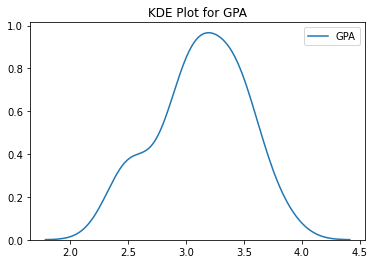

In [201]:
sns.kdeplot(survey.GPA)
plt.title('KDE Plot for GPA')
plt.show()

In [164]:
gpa_salry = np.random.choice(survey['Salary'], size=30)
z2, p2 = stats.normaltest(gpa_salry)
alpha = 0.05
print("p2 = {:g}".format(p2))

if p2 < alpha:  # null hypothesis: gpa_salry comes from a normal distribution
    print("The null hypothesis can be rejected")
    
else:
    print("The null hypothesis cannot be rejected")

p2 = 0.132557
The null hypothesis cannot be rejected


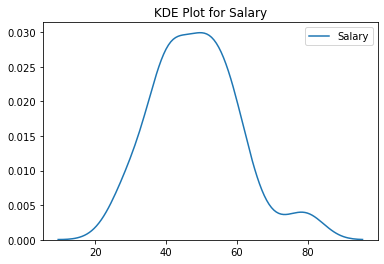

In [202]:
sns.kdeplot(survey.Salary)
plt.title('KDE Plot for Salary')
plt.show()

In [166]:
gpa_spnd = np.random.choice(survey['Spending'], size=30)
z3, p3 = stats.normaltest(gpa_spnd)
alpha = 0.05
print("p3 = {:g}".format(p3))

if p3 < alpha:  # null hypothesis: gpa_spnd comes from a normal distribution
    print("The null hypothesis can be rejected")
    
else:
    print("The null hypothesis cannot be rejected")

p3 = 0.0120857
The null hypothesis can be rejected


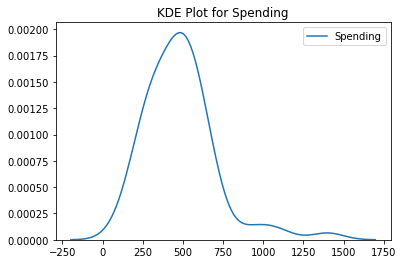

In [203]:
sns.kdeplot(survey.Spending)
plt.title('KDE Plot for Spending')
plt.show()

In [168]:
gpa_txt = np.random.choice(survey['Spending'], size=30)
z4, p4 = stats.normaltest(gpa_txt)
alpha = 0.05
print("p4 = {:g}".format(p4))

if p4 < alpha:  # null hypothesis: gpa_txt comes from a normal distribution
    print("The null hypothesis can be rejected")
    
else:
    print("The null hypothesis cannot be rejected")

p4 = 0.000433961
The null hypothesis can be rejected


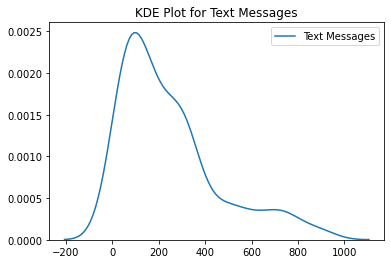

In [204]:
sns.kdeplot(survey['Text Messages'])
plt.title('KDE Plot for Text Messages')
plt.show()

# A&B Shingles Data

In [170]:
df = pd.read_csv('A & B_shingles-1.csv')

In [171]:
df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [172]:
df.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


### 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [173]:
#Testing the A Shingles
import scipy.stats as stats
from scipy.stats import ttest_1samp

In [174]:
t_stat_a, p_value_a = stats.ttest_1samp(df['A'], popmean=.35)

In [175]:
t_stat_a

-1.4735046253382782

In [176]:
p_value_a

0.14955266289815025

In [177]:
p_value1 = p_value_a/2

In [178]:
alpha = 0.05
if (p_value1 < alpha):
    print("Reject Null Hypothesis. True Mean is not equal to {}".format(.35))
else:
    print("We fail to Reject Null Hypothesis")

We fail to Reject Null Hypothesis


In [180]:
#Testing the B Shingles

t_stat_b, p_value_b = stats.ttest_1samp(df.dropna()['B'], popmean=.35)

In [181]:
t_stat_b

-3.1003313069986995

In [182]:
p_value_b

0.004180954800638363

In [183]:
p_value2 = p_value_b/2

In [184]:
alpha = 0.05
if (p_value2 < alpha):
    print("Reject Null Hypothesis. True Mean is not equal to {}".format(.35))
else:
    print("We fail to Reject Null Hypothesis")

Reject Null Hypothesis. True Mean is not equal to 0.35


### 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [185]:
from scipy.stats import ttest_ind

A_mean=df["A"].mean()
B_mean=df["B"].mean()
print("The mean moisture score of A is {} whereas the mean score of B is {}".format(A_mean,B_mean))

t_stat,p_val= stats.ttest_ind(df['A'],df.dropna()['B'])

alpha = 0.05

if p_val > alpha:
        print('Same distributions (fail to reject H0)')
else:
        print('Different distributions (reject H0)')

The mean moisture score of A is 0.3166666666666666 whereas the mean score of B is 0.2735483870967742
Same distributions (fail to reject H0)


In [186]:
p_val

0.2017496571835328

In [187]:
t_stat

1.289628271966112